# Note to reader

This is V1.2 of the code for Part 2 of assignment 1 for QBUS2820

Changes include:

1. Checking for NaN values in dataset
2. Added the best subset model selection algorithm with a loop for all k values
3. Added MSE to algorithm calculation

---------------

# Brief

Find the most appropriate predictive models of your choice to predict NBA player salary from performance statistics.

As a consultant working for a sports data analytics company, the NBA league approached you to develop predictive models to predict NBA salaries based on state-of-art techniques from predictive analytics. To enable this task, you were provided with a dataset containing highly detailed performance of the NBA players. The response is the SALARY($Millions) column in the dataset.

As part of the contract, you need to write a report according to the details below. The client will use a test set to evaluate your work, using RSME as the scoring metric

Your report must include the validation scores for at least five different sets of predictions, including your final 2 best models. You need to make a submission on Kaggle to get each validation score. You need to present your final 2 best models in details. For the other three additional methods, only brief explanations of the models are needed.

# Explanation of Acronym

Glossary very helpful https://stats.nba.com/help/glossary/

**PER** - Personal efficiency rating

**TS** - True shooting percentage

**ORB** - Offensive rebounds

**DRB** - Defensive rebounds

**TRB** - Total rebounds

**AST** - Assists

**STL** - Steals

**BLK** - Blocks

**TOV** - Turnover percentage (per possession)

**USG** - Usage percentage

**ORtg** - Offensive rating

**DRtg** - Defensive rating

**OWS** - Offensive win shares

**DWS** - Defensive win shares

**WS** - Win shares


----------------

# Table of Contents

1. Relevant Packages
2. Importing Data
3. Variable and lists
4. Data Cleaning
5. Exploratory Data Analysis

## Relevant Packages

In [1]:
#pandas used for importing data in a dataframe that can be examined
import pandas as pd

#numpy used for preforming various calculations with dataframes
import numpy as np

#random used for random number generation
import random as random

#time used to time calculations
import time as time

#itertools used for better looping functions
import itertools

#statsmodels used for statistical models like OLS
import statsmodels.api as sm
import statsmodels.formula.api as smf

#sklearn modules used for regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#matplotlib and seaborn both used for graphing data
import matplotlib.pyplot as plt
import seaborn as sns

C:\Program Files\Anaconda3-5.0.1x64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Importing Data

In [2]:
#read_csv is used for .csv
Raw_Train = pd.read_csv('p2_train.csv') 

Raw_Train.head(10) #note that the ... column is not shown for space saving reasons

,Train_ID,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
0,1,2.288205,SG,Orlando Magic,21,76,1503,10.3,0.533,2.4,...,11.6,1.1,0.3,14.3,19.7,101,111,0.6,0.8,1.4
1,2,2.139000,PG,Washington Wizards,29,52,1114,12.5,0.530,1.0,...,13.0,0.8,0.0,11.0,23.8,102,113,0.6,0.3,1.0
2,3,8.000000,SG,New York Knicks,28,73,2552,16.0,0.574,1.4,...,16.9,0.7,0.1,11.2,23.3,110,112,4.3,1.0,5.3
3,4,5.158539,SG,Memphis Grizzlies,32,55,1278,15.6,0.531,7.3,...,11.7,3.8,1.2,16.2,20.1,102,101,0.5,2.1,2.7
4,5,3.333333,PF,Atlanta Hawks,25,80,1482,15.3,0.559,4.9,...,8.9,1.0,0.4,10.3,23.5,105,108,1.3,1.2,2.6
5,6,3.272091,C,Detroit Pistons,20,81,2619,22.6,0.599,17.5,...,2.2,2.0,4.0,10.7,16.7,121,104,6.4,3.5,9.9
6,7,17.120106,SF,Indiana Pacers,23,80,2898,20.1,0.555,2.6,...,17.9,2.7,0.6,12.5,28.3,107,97,4.4,6.4,10.8
7,8,1.252440,SF,Detroit Pistons,22,43,395,6.7,0.460,3.2,...,4.3,1.1,0.2,9.4,15.4,93,108,-0.2,0.3,0.2
8,9,3.034356,SG,Charlotte Hornets,21,78,1538,13.4,0.522,2.1,...,11.8,1.8,1.4,8.7,20.1,106,105,1.4,1.8,3.3
9,10,12.404495,PG,Houston Rockets,26,62,2222,19.0,0.554,1.9,...,38.2,2.2,0.3,16.9,22.7,113,110,4.8,1.5,6.3


In [3]:
#checking for empty cells
if Raw_Train.empty:
    print('DataFrame is empty!')
else:
    print('Good to go!')

Good to go!


In [4]:
#checking for NaN values
if Raw_Train.isnull().any().any():
    NaN_Sum = Raw_Train.isnull().sum().sum() 
    print('Dataframe has NaN values:', NaN_Sum)
else:
    print('Good to go!')

Good to go!


### Notes

There are no empty or incorrect observations/cells so we can begin with our EDA. Data cleaning is not necessary as the data seems to be of acceptable quality


Moreover, no changes to the names or values of observations were made

In [5]:
Train = Raw_Train

## Variables and List

Created some variables and list to prepare for subsequent coding. Probably not best method to place it here but meh. Open to suggestions

In [6]:
#use this list for the scatterplot matrix and other big functions
Allvariables = [
    'SALARY',
    'POSITION',
    'TEAM',
    'Age',
    'Games',
    'Minutes',
    'PER',
    'TS',
    'ORB',
    'DRB',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'USG',
    'ORtg',
    'DRtg',
    'OWS',
    'DWS',
    'WS',
]

#Is all variables except salary and categorical variables
Allintegerx = [
    'Age',
    'Games',
    'Minutes',
    'PER',
    'TS',
    'ORB',
    'DRB',
    'TRB',
    'AST',
    'STL',
    'BLK',
    'TOV',
    'USG',
    'ORtg',
    'DRtg',
    'OWS',
    'DWS',
    'WS',    
]

## Exploratory Data Analysis

Need to make sure our data is acceptable for OLS regression and KNN. We are testing for the 5+1 assumptions in OLS

1. Regression model is linear in parameters
There should be no non-linear variables. We only have integer or % values. 

2. Random sampling of observations, (iid)
We can assume yes as the data was given to us and it appears to be randomly taken from basketball teams

3. Homoscedastic residuals or equal variance of residuals
Use a plot of residuals to check when model is made

4. Conditional mean of error terms is 0
No relationship between error and X

5. No multi-collinearity
Need to be careful of overall rating = defensive + offensive rating

6. Error terms are normally distributed
Use a plot of errors to check when model is made

### Scatterplot Matrix

Download the image to see it properly. Check the discord for the jpeg format because you may open the png copy which removes the white background

In [7]:
#Scatterplot_Matrix_1 = sns.pairplot(Train[Allvariables], 
#                                    kind= 'reg', 
#                                    plot_kws = {'scatter_kws' :{'color': sns.color_palette('Blues')[-1],
#                                    'alpha': 0.4}})

#plt.tight_layout()
#plt.show()

### Graphs for the response variable (SALARY)

The boxplot shows an alright distribution for salary. We expect to have some high salary for star players. Furthermore, the pattern plot shows no obvious pattern so we can say no other variable is affecting salary.

If we do create a OLS model, we could use a log model to nullify the outliers

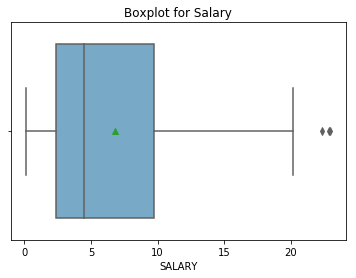

In [8]:
#boxplot
Boxplot_Salary = sns.boxplot(x= Train['SALARY'], data= Train, palette='Blues', showmeans=True)

plt.title('Boxplot for Salary')

plt.show()

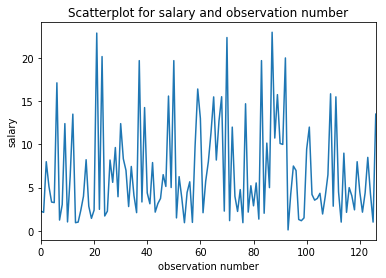

In [9]:
#patternplot
Train['SALARY'].plot()

plt.title('Scatterplot for salary and observation number')
plt.xlabel('observation number')
plt.ylabel('salary')

plt.show()

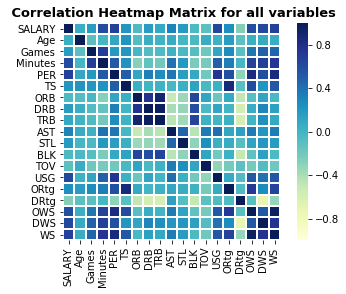

In [10]:
Heatmap_Matrix_1 = sns.heatmap(Train[Allvariables].corr(), 
            vmax= 1, 
            vmin= -1, 
            center= 0,
            square= True,
            linewidths=1,
            annot= False,
            #ax= Heatmap_Matrix_1,
            cmap= 'YlGnBu')

Heatmap_Matrix_1.set_title(' Correlation Heatmap Matrix for all variables', fontweight= 'bold', fontsize= 13)

plt.show()

## Model Selection

Created my own function using the help of these links: (have to check up on if we're plagarising)

http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html

https://xavierbourretsicotte.github.io/subset_selection.html

In [11]:
#function used to create a linear regression model
#calculates an OLS model and subsequently, MSE, RSS and Rsquared
def Temp_OLS(X, Y):
    Tempmodel = linear_model.LinearRegression(fit_intercept= True)
    Tempmodel.fit(X, Y)
    MSE = mean_squared_error(Y, Tempmodel.predict(X))
    RSS = mean_squared_error(Y, Tempmodel.predict(X)) * len(Y)
    Rsquared = Tempmodel.score(X, Y)

    return MSE, RSS, Rsquared

In [40]:
#model selection algorithm
Y = Train['SALARY']
X = Train.drop(['Train_ID', 'SALARY', 'TEAM', 'POSITION'], axis= 1)

MSE_List = []
RSS_List = []
Rsquared_List = []
Feature_Number = []
Feature_List = []

for Kilo in range(1, 6): #note max value of kilo (k) is 20 as no categorical predictors
    for combinations in itertools.combinations(X.columns, Kilo):
        Temp_Result = Temp_OLS(X[list(combinations)], Y) #convert tuple to list
        MSE_List.append(Temp_Result[0])    
        RSS_List.append(Temp_Result[1])
        Rsquared_List.append(Temp_Result[2]) 
        Feature_Number.append(len(combinations))    
        Feature_List.append(combinations)

#little calculation to get % value for Rsquared
Rsquared_Pct = [numero * 100 for numero in Rsquared_List]
    
Stepwise = pd.DataFrame({
    'Feature Number': Feature_Number,
    'Features': Feature_List,
    'MSE': MSE_List,
    'RSS': RSS_List,
    'R Squared': Rsquared_List,
    'R Squared %':Rsquared_Pct
})

Stepwise

,Feature Number,Features,MSE,R Squared,R Squared %,RSS
0,1,"(Age,)",31.678397,0.002221,0.222093,4023.156457
1,1,"(Games,)",30.737101,0.031869,3.186909,3903.611783
2,1,"(Minutes,)",19.865426,0.374296,37.429580,2522.909088
3,1,"(PER,)",17.346936,0.453621,45.362103,2203.060913
4,1,"(TS,)",30.270705,0.046559,4.655922,3844.379550
5,1,"(ORB,)",31.663094,0.002703,0.270295,4021.212892
6,1,"(DRB,)",30.827014,0.029037,2.903707,3915.030789
7,1,"(TRB,)",31.477580,0.008546,0.854611,3997.652651
8,1,"(AST,)",28.531383,0.101343,10.134291,3623.485607
9,1,"(STL,)",30.699388,0.033057,3.305692,3898.822326


In [41]:
#finding the smallest MSE values
Stepwise_Min = Stepwise.nsmallest(10, 'MSE')
Stepwise_Max = Stepwise.nlargest(10, 'MSE')

Stepwise_Min

,Feature Number,Features,MSE,R Squared,R Squared %,RSS
6866,5,"(Games, Minutes, USG, DRtg, OWS)",11.237626,0.646047,64.604687,1427.178499
6868,5,"(Games, Minutes, USG, DRtg, WS)",11.239537,0.645987,64.598669,1427.421159
6504,5,"(Games, Minutes, PER, USG, DRtg)",11.313285,0.643664,64.366382,1436.787206
6869,5,"(Games, Minutes, USG, OWS, DWS)",11.325258,0.643287,64.328670,1438.307788
6506,5,"(Games, Minutes, PER, USG, DWS)",11.331655,0.643085,64.308523,1439.120141
6871,5,"(Games, Minutes, USG, DWS, WS)",11.343534,0.642711,64.271105,1440.628870
6750,5,"(Games, Minutes, TRB, USG, DWS)",11.362808,0.642104,64.210399,1443.076620
6582,5,"(Games, Minutes, TS, USG, DRtg)",11.366806,0.641978,64.197807,1443.584349
6650,5,"(Games, Minutes, ORB, USG, DWS)",11.368462,0.641926,64.192589,1443.794720
6510,5,"(Games, Minutes, PER, ORtg, DWS)",11.406690,0.640722,64.072183,1448.649637


In [52]:
#finding minimum MSE value
MSEMin = Stepwise['MSE'].min()
MSEMin

11.237625975593128

# What to do

Need to find the highest MSE from each feature number and then use that to create the learning curve rather than have all MSE values create the curve.

Furthermore, find a way to search for lowest MSE and feature number and print it

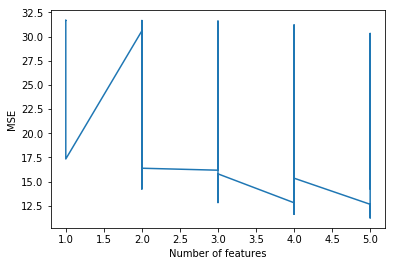

Lowest MSE = 11.237625975593128


In [50]:
fig, ax=plt.subplots()
ax.plot(Stepwise['Feature Number'], Stepwise['MSE'], color= '#1F77B4')
ax.set_xlabel('Number of features')
ax.set_ylabel('MSE')
plt.show()

print('Lowest MSE = {}'.format(Stepwise['MSE'].min()))
print('With feature number = {}'.format(Stepwise))

In [ ]:
fig, ax= plt.subplots()
ax.plot(neighbours, test_rmse, color='#1F77B4')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test error')
plt.show()

print('Lowest test error: K = {}'.format(1 + np.argmin(test_rmse)))


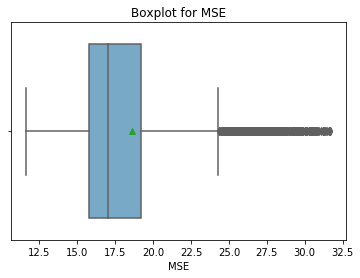

In [36]:
#boxplot
Boxplot_MSE = sns.boxplot(x= Stepwise['MSE'], data= Stepwise, palette= 'Blues', showmeans= True)

plt.title('Boxplot for MSE')

plt.show()

## Old Code and stuff

In [26]:
#Variables used in model selection
Y = Train['SALARY']
X = Train.drop(['Train_ID', 'SALARY', 'TEAM', 'POSITION'], axis= 1)
Kilo = 1 #k value, only 20 as no categorical predictors (team, position)

MSE_List = []
RSS_List = []
Rsquared_List = []
Feature_Number = []
Feature_List = []

#using itertools to loop overall combinations of X choose Kilo
for combinations in itertools.combinations(X.columns, Kilo):
    Temp_Result = Temp_OLS(X[list(combinations)], Y) #convert tuple to list
    MSE_List.append(Temp_Result[0])    
    RSS_List.append(Temp_Result[1])
    Rsquared_List.append(Temp_Result[2]) 
    Feature_Number.append(len(combinations))    
    Feature_List.append(combinations)

#little calculation to get % value for Rsquared
Rsquared_Pct = [numero * 100 for numero in Rsquared_List]
    
Stepwise = pd.DataFrame({
    'Number of features': Feature_Number,
    'Features': Feature_List,
    'MSE': MSE_List,
    'RSS': RSS_List,
    'R Squared': Rsquared_List,
    'R Squared %':Rsquared_Pct
})

Stepwise

,Features,MSE,Number of features,R Squared,R Squared %,RSS
0,"(Age,)",31.678397,1,0.002221,0.222093,4023.156457
1,"(Games,)",30.737101,1,0.031869,3.186909,3903.611783
2,"(Minutes,)",19.865426,1,0.374296,37.429580,2522.909088
3,"(PER,)",17.346936,1,0.453621,45.362103,2203.060913
4,"(TS,)",30.270705,1,0.046559,4.655922,3844.379550
5,"(ORB,)",31.663094,1,0.002703,0.270295,4021.212892
6,"(DRB,)",30.827014,1,0.029037,2.903707,3915.030789
7,"(TRB,)",31.477580,1,0.008546,0.854611,3997.652651
8,"(AST,)",28.531383,1,0.101343,10.134291,3623.485607
9,"(STL,)",30.699388,1,0.033057,3.305692,3898.822326


In [ ]:
Test = Stepwise.groupby(['MSE']).size().sort_values()
Test

In [ ]:
#heatmap matrix https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, Heatmap_Matrix_1 = plt.subplots()
sns.heatmap(Train[Allvariables].corr(), 
            vmax= 1, 
            vmin= -1, 
            center= 0,
            square= True,
            linewidths=.5,
            annot= False, #don't set true as there are too many variables
            ax= Heatmap_Matrix_1, 
            cmap= 'YlGnBu')

Heatmap_Matrix_1.set_title(' Correlation Heatmap Matrix for all variables', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()